## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

Pedro Cintra

- Nesse notebook contendo o projeto de formação em Data Science da Alura, exploramos dois datasets distintos, contendo informações de filmes, notas e diversas informações dispersas.
O objetivo foi cruzar essas informações de forma relevante para que pudesse ser feita uma análise de como cada um desses dados interfere um no outro.
Para isso, utilizamos de ferramentas aprendidas em aulas, e plotamos diversos gráficos para ajudar visualmente e nos fornecer uma direção onde possamos traçar objetivos e estratégias diferentes de acordo com cada análise.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.2
Usando seaborn 0.9.0
Usando scipy 1.3.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'
filmes = pd.read_csv(uri_filmes)

In [4]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Alterando o nome das colunas:

In [6]:
filmes.columns=['filmeId','titulo','generos']
filmes.set_index('filmeId', inplace=True)
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


Vamos extrair o ano dos filmes (código já pronto): 

In [7]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [8]:
uri_notas = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'
notas = pd.read_csv(uri_notas)

In [9]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas.columns=['usuarioId','filmeId','nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
filmes['nota_media'] = notas.groupby('filmeId').mean()['nota']

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429




## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução para calcular o total de votos por filme
total_de_votos = notas.groupby('filmeId').count()

In [14]:
# solução para criar a nova coluna e filtrar os filmes]
filmes_com_50_ou_mais_votos = total_de_votos.query('nota >= 50')['nota']
filmes['total_de_votos'] = filmes_com_50_ou_mais_votos
filmes.dropna(inplace=True)

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Nota média dos filmes com 50 ou mais votos')

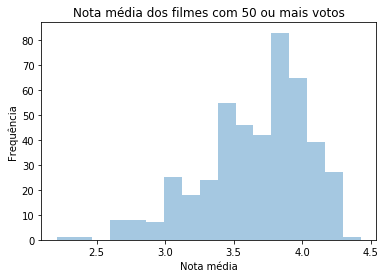

In [16]:
# solução histograma
ax = sns.distplot(filmes.nota_media, norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Nota média dos filmes com 50 ou mais votos')

Text(0.5, 1.0, 'Nota média cumulativa dos filmes com 50 ou mais votos')

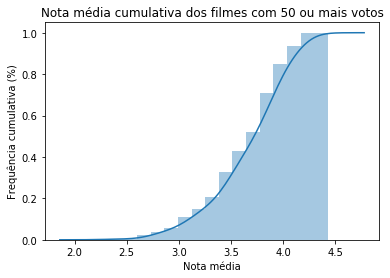

In [17]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Frequência cumulativa (%)')
ax.set_title('Nota média cumulativa dos filmes com 50 ou mais votos')

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Total de votos dos filmes com 50 ou mais votos')

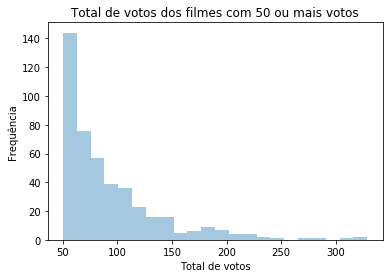

In [18]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos,norm_hist= False, kde= False)
ax.set(xlabel='Total de votos', ylabel='Frequência',)
ax.set_title('Total de votos dos filmes com 50 ou mais votos')

Text(0.5, 1.0, 'Total de votos cumulativo dos filmes com 50 ou mais votos')

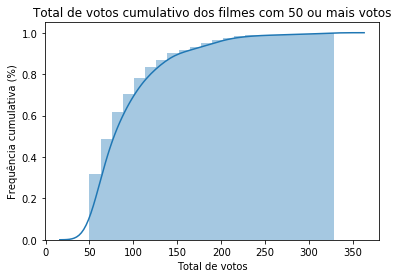

In [19]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set(xlabel='Total de votos', ylabel='Frequência cumulativa (%)')
ax.set_title('Total de votos cumulativo dos filmes com 50 ou mais votos')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [20]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(.20)

In [21]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [22]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [23]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Quantidade de filmes por Gênero')

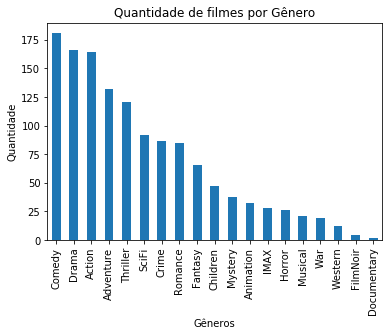

In [24]:
# solução
generos_por_quantidade = generos.sum().sort_values(ascending = False)
generos_por_quantidade.plot.bar()
plt.xlabel('Gêneros')
plt.ylabel('Quantidade')
plt.title('Quantidade de filmes por Gênero')


## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [25]:
# solução
top5_generos_em_quantidade_de_filmes = generos_por_quantidade[:5]

In [26]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [27]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [28]:
# solucão
votos_por_genero_por_filme_ordenado = votos_por_genero_por_filme.sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Quantidade de votos por Gênero por Filme')

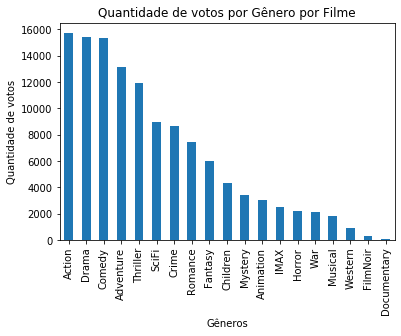

In [29]:
# solução
votos_por_genero_por_filme_ordenado.plot.bar()
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de votos')
plt.title('Quantidade de votos por Gênero por Filme')

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [30]:
# solucao código
popularidade_dos_generos = votos_por_genero_por_filme.sum()/generos.sum()
popularidade_dos_generos_ordenada = popularidade_dos_generos.sort_values(ascending = False)

Text(0.5, 1.0, 'Popularidade dos Filmes por Gênero')

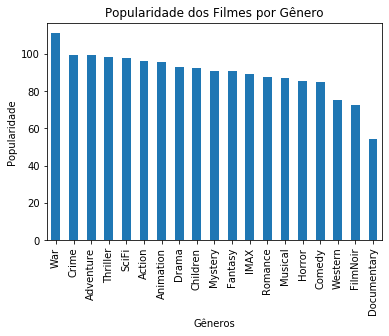

In [31]:
# solução com visualização 
popularidade_dos_generos_ordenada.plot.bar()
plt.xlabel('Gêneros')
plt.ylabel('Popularidade')
plt.title('Popularidade dos Filmes por Gênero')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
Existem muito mais filmes do genero "Action", tão como a quantidade de votos para o mesmo. Porém, ao dividirmos a quantidade de votos pela quantidade de filmes do mesmo genero, podemos perceber que a popularidade dos filmes do genero "War" é relativamente maior
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [32]:
filmes_com_total_de_votos = pd.merge(filmes, total_de_votos, on = 'filmeId')
generos_com_total_de_votos = generos.apply(lambda col: col*filmes_com_total_de_votos['nota'])
generos_com_total_de_votos.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,
1,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
2,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
6,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
7,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


Text(0.5, 1.0, 'Distribuição das notas de acordo com generos')

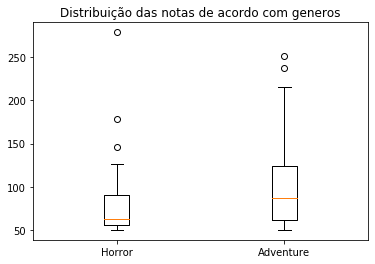

In [33]:
# solução:
horror =  generos_com_total_de_votos.query('Horror > 0')['Horror']
adventure =  generos_com_total_de_votos.query('Adventure > 0')['Adventure']

plt.boxplot([horror, adventure], labels=["Horror",'Adventure'])
plt.title("Distribuição das notas de acordo com generos")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 0, 'generos')

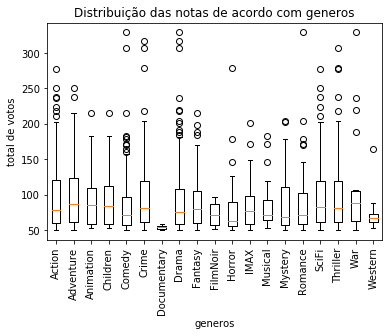

In [34]:
# solução:

action =  generos_com_total_de_votos.query('Action > 0')['Action']
adventure =  generos_com_total_de_votos.query('Adventure > 0')['Adventure']
animation =  generos_com_total_de_votos.query('Animation > 0')['Animation']
children =  generos_com_total_de_votos.query('Children > 0')['Children']
comedy =  generos_com_total_de_votos.query('Comedy > 0')['Comedy']
crime =  generos_com_total_de_votos.query('Crime > 0')['Crime']
documentary =  generos_com_total_de_votos.query('Documentary > 0')['Documentary']
drama =  generos_com_total_de_votos.query('Drama > 0')['Drama']
fantasy =  generos_com_total_de_votos.query('Fantasy > 0')['Fantasy']
filmnoir =  generos_com_total_de_votos.query('FilmNoir > 0')['FilmNoir']
horror =  generos_com_total_de_votos.query('Horror > 0')['Horror']
imax =  generos_com_total_de_votos.query('IMAX > 0')['IMAX']
musical =  generos_com_total_de_votos.query('Musical > 0')['Musical']
mystery =  generos_com_total_de_votos.query('Mystery > 0')['Mystery']
romance =  generos_com_total_de_votos.query('Romance > 0')['Romance']
scifi =  generos_com_total_de_votos.query('SciFi > 0')['SciFi']
thriller =  generos_com_total_de_votos.query('Thriller > 0')['Thriller']
war =  generos_com_total_de_votos.query('War > 0')['War']
western =  generos_com_total_de_votos.query('Western > 0')['Western']


plt.boxplot([action, adventure, animation, children, comedy, crime, documentary, 
             drama, fantasy, filmnoir, horror, imax, musical, mystery, romance,
            scifi, thriller, war, western], 
         labels=['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'])
plt.title("Distribuição das notas de acordo com generos")
plt.xticks(rotation=90)
plt.ylabel('total de votos')
plt.xlabel('generos')

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
- Difícil analisar sem levar em conta o budget ou o revenue, porém, apenas com uma análise gráfica, percebemos que o genero Adventure, mesmo tendo mais filmes, recebe mais votos e tem mais popularidade (votos sobre a quantidade de filmes) do que o genero Horror


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

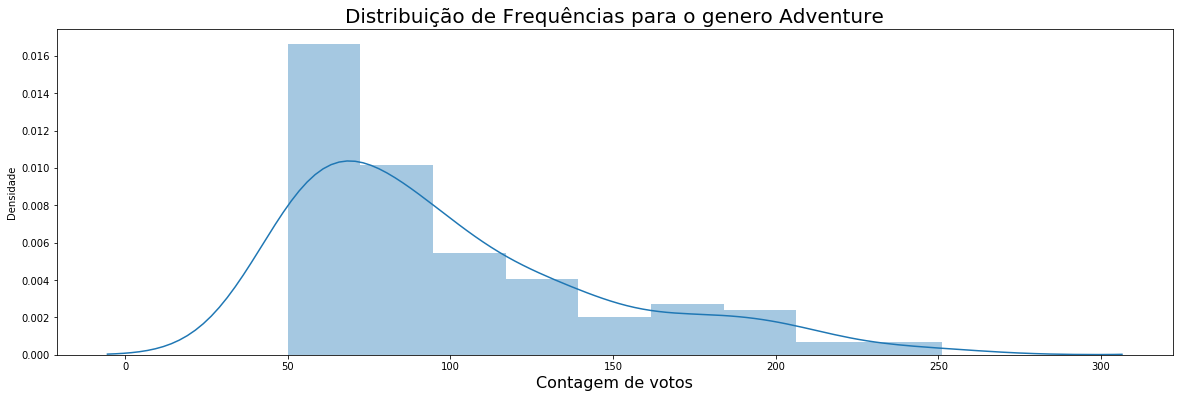

In [35]:
# solucao histograma de aventura

selecao_adventure = votos_por_genero_por_filme.query('Adventure > 0')['Adventure']
ax = sns.distplot(selecao_adventure)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Adventure', fontsize=20)
ax.set_xlabel('Contagem de votos', fontsize=16)
ax.set_ylabel('Densidade')
ax

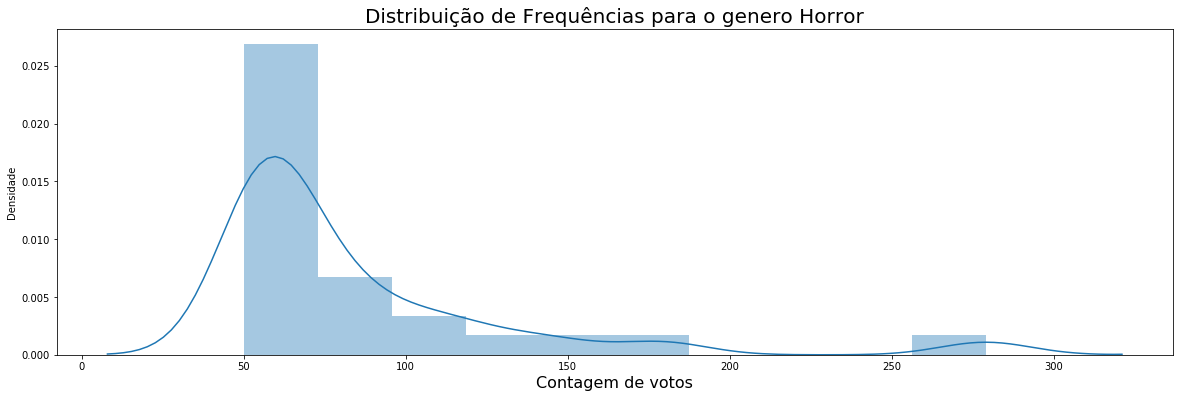

In [36]:
# solucao histograma de horror
selecao_horror = votos_por_genero_por_filme.query('Horror > 0')['Horror']
ax = sns.distplot(selecao_horror)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Horror', fontsize=20)
ax.set_xlabel('Contagem de votos', fontsize=16)
ax.set_ylabel('Densidade')
ax

In [37]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
pvalue_adventure = scipy.stats.normaltest(selecao_adventure)
pvalue_horror = scipy.stats.normaltest(selecao_horror)

print ('O resultado do pvalue para o genero Adventure foi de: ', pvalue_adventure[1].round(5))
print ('O resultado do pvalue para o genero Horror foi de: ', pvalue_horror[1].round(5))

O resultado do pvalue para o genero Adventure foi de:  1e-05
O resultado do pvalue para o genero Horror foi de:  0.0


- Não há significância estatística para aplicar correções de normalidade

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [38]:
# solução:
generos_com_nota_media = generos.apply(lambda col: col*filmes['nota_media'])
generos_com_nota_media.head()

horror_media =  generos_com_nota_media.query('Horror > 0')['Horror']
adventure_media =  generos_com_nota_media.query('Adventure > 0')['Adventure']

Text(0, 0.5, 'Nota Média')

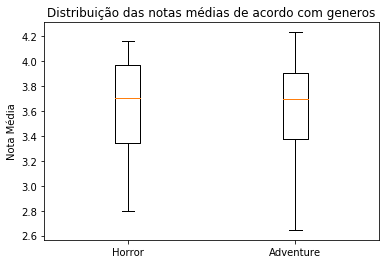

In [39]:
plt.boxplot([horror_media, adventure_media], labels=["Horror",'Adventure'])
plt.title("Distribuição das notas médias de acordo com generos")
plt.ylabel('Nota Média')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Analisando graficamente, tanto a distribuição de melhores notas, quanto a mediana das notas para o genero Horror é maior do que do genero Adventure, mostrando que ele tem uma maior chance de ser um sucesso de crítica.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

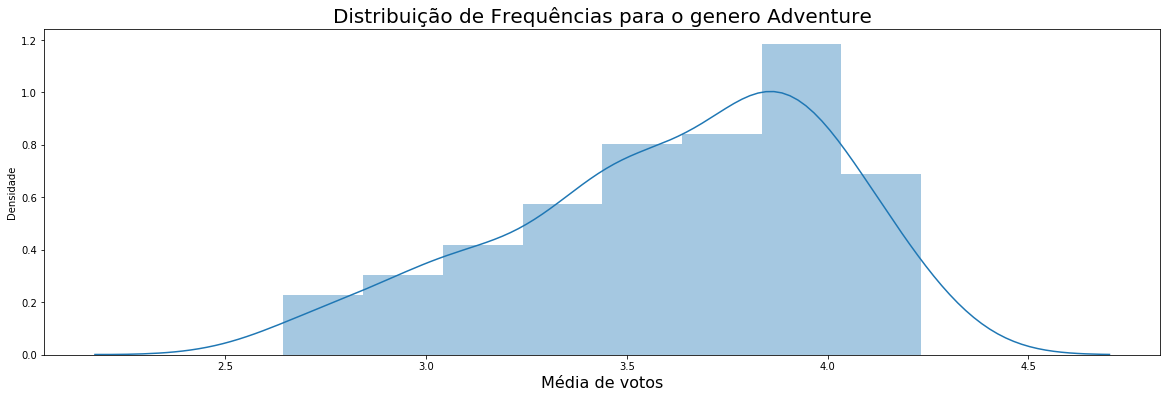

In [40]:
# solucao histograma de aventura
selecao_adventure_media = generos_com_nota_media.query('Adventure > 0')['Adventure']
ax = sns.distplot(selecao_adventure_media)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Adventure', fontsize=20)
ax.set_xlabel('Média de votos', fontsize=16)
ax.set_ylabel('Densidade')
ax

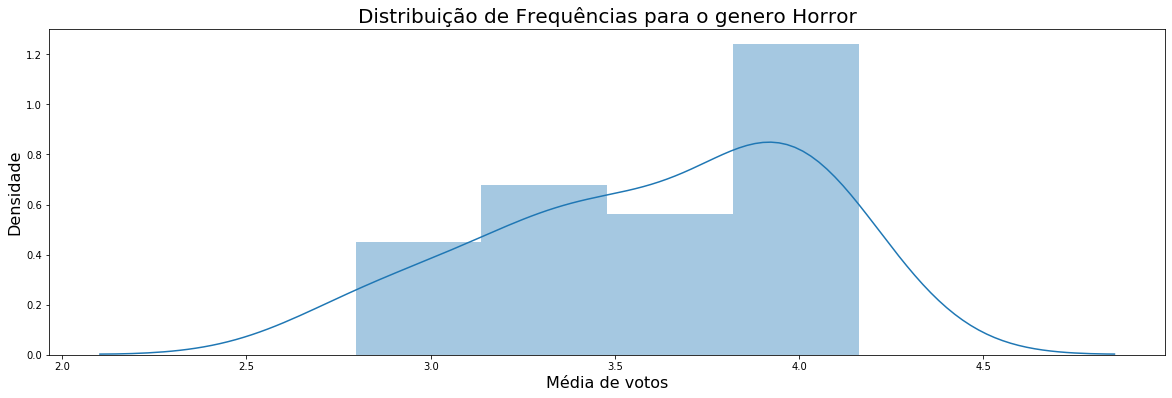

In [41]:
# solucao histograma de horror
selecao_horror_media = generos_com_nota_media.query('Horror > 0')['Horror']
ax = sns.distplot(selecao_horror_media)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências para o genero Horror', fontsize=20)
ax.set_xlabel('Média de votos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

In [42]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
pvalue_adventure_media = scipy.stats.normaltest(selecao_adventure_media)
pvalue_horror_media = scipy.stats.normaltest(selecao_horror)

print ('O resultado do pvalue para o genero Adventure foi de: ', pvalue_adventure[1].round(5))
print ('O resultado do pvalue para o genero Horror foi de: ', pvalue_horror[1].round(5))

O resultado do pvalue para o genero Adventure foi de:  1e-05
O resultado do pvalue para o genero Horror foi de:  0.0


- Não há significância estatística para aplicar correções de normalidade

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
O genero Horror, analisando a distribuição, recebe uma nota máxima menor do que o genero Adventure, mas ao mesmo tempo, não recebe tantas notas baixas quanto Adventure. Se o considerado for a maior nota, recomendo o Adventure, pois é o que chega num valor máximo maior, porém se o fator considerado for a segurança de não receber críticas negativas, mantenho a minha opinião sobre o genero Horror

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Conforme explicado anteriormente, levando em conta os fatores descritos, recomendaria o genero Adventure, onde costuma receber notas mais altas, além de ser mais popular


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [43]:
# solução: calculando os 2 generos mais votados
print('generos mais votados:')
print(votos_por_genero_por_filme.sum()[:2])

generos mais votados:
Action       15734.0
Adventure    13117.0
dtype: float64


In [44]:
# solução: encontrando os top 5 filmes desses generos
generos_com_valor_nota_media = generos.apply(lambda col: col*filmes['nota_media'])
top5_melhor_avaliados_adventure = generos_com_valor_nota_media['Adventure'].sort_values(ascending = False)
top5_melhor_avaliados_horror = generos_com_valor_nota_media['Horror'].sort_values(ascending = False)

In [45]:
top_10_melhor_avaliados_dos_generos_mais_votados = pd.Series.append(top5_melhor_avaliados_adventure,top5_melhor_avaliados_horror)
top_10_melhor_avaliados_dos_generos_mais_votados.sort_values(ascending = False)[:5]

print('Os top 5 filmes dos 2 generos mais assistidos são:')
print(filmes.query('filmeId == 1197')['titulo'])
print(filmes.query('filmeId == 260')['titulo'])
print(filmes.query('filmeId == 1196')['titulo'])
print(filmes.query('filmeId == 1198')['titulo'])
print(filmes.query('filmeId == 908')['titulo'])

Os top 5 filmes dos 2 generos mais assistidos são:
filmeId
1197    Princess Bride, The (1987)
Name: titulo, dtype: object
filmeId
260    Star Wars: Episode IV - A New Hope (1977)
Name: titulo, dtype: object
filmeId
1196    Star Wars: Episode V - The Empire Strikes Back...
Name: titulo, dtype: object
filmeId
1198    Raiders of the Lost Ark (Indiana Jones and the...
Name: titulo, dtype: object
filmeId
908    North by Northwest (1959)
Name: titulo, dtype: object


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [51]:
# solucao
correlacao_genero_nota_media = pd.DataFrame.corr(filmes)
correlacao_genero_nota_media['nota_media'].sort_values(ascending=False)


nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

#### Resposta:
- Os Generos com maior correlação com a nota média são: Drama e Crime
- Os Generos com menor correlação com a nota média são: Documentary e Musical (mais próximos de 0), 
- os Generos Action e Comedy, são os com correlação negativa maior

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [52]:
# solucao
correlacao_genero_total_de_votos = pd.DataFrame.corr(filmes)
correlacao_genero_total_de_votos['total_de_votos'].sort_values(ascending = False)


total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

#### Resposta:
- Os Generos com maior correlação com o total de votos são: Adventure e War
- Os Generos com menor correlação com o total de votos são: Children e Mystery (mais próximos de 0)
- Western e Comedy são os Generos com maior correlação Negativa

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

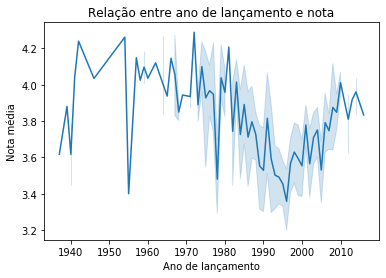

In [53]:
# solucao
ax = sns.lineplot(x=filmes.ano_de_lancamento, y=filmes.nota_media)
ax.set_title('Relação entre ano de lançamento e nota')
ax.set_ylabel('Nota média')
ax.set_xlabel('Ano de lançamento')
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [54]:
# solução (código)
corr_ano_lancamento_nota_media = pd.DataFrame.corr(filmes)['nota_media'][0]
corr_ano_lancamento_nota_media

-0.1591455520444448

### Solução (explicação)
A correlação é negativa e pode gerar um erro de interpretação.
O "erro" trata-se do fato do ano de lançamento não ter relação com o período que o filme foi avaliado.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [55]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]

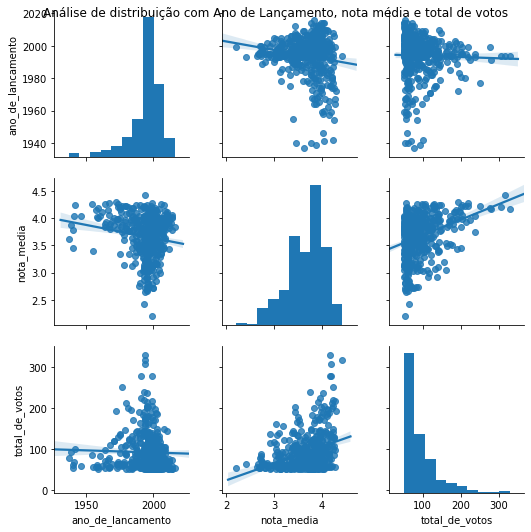

In [56]:
ax = sns.pairplot(infos, kind = 'reg')
ax.fig.suptitle('Análise de distribuição com Ano de Lançamento, nota média e total de votos')
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 0.98, 'Análise de distribuição com Ano de Lançamento, nota média e total de votos, destacando o genero Animation')

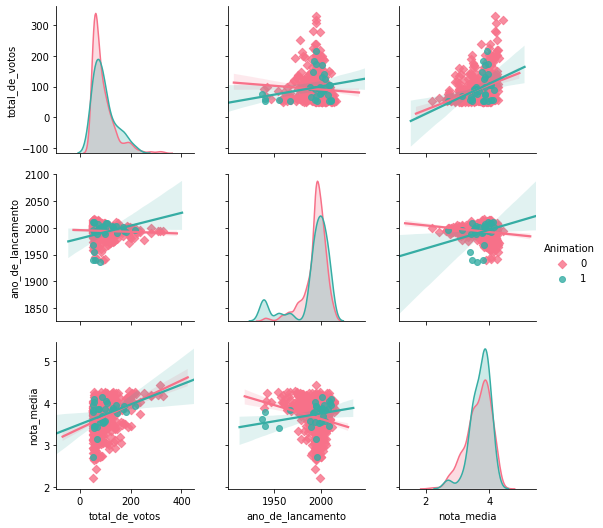

In [58]:
sns.pairplot(filmes, hue='Animation', palette='husl', kind = 'reg', 
             markers = ['D','o'],
             x_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'], 
             y_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'])
ax.fig.suptitle('Análise de distribuição com Ano de Lançamento, nota média e total de votos, destacando o genero Animation')

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

- Analisando o pairplot, parece haver uma maior distribuição de nota média com valores mais altos à medida que o ano de lançamento também aumenta, ou seja, tem uma correlação positiva, mesmo que baixa. Não parece ser linear, uma vez que temos elementos espalhados em todo o gráfico e não seguem uma tendencia.
- Da mesma forma que a nota média, o total de votos segue com uma correlação positiva, e uma linearidade um pouco maior, mesmo que ainda tenha elementos espalhados por todo o gráfico
- Comparando com todas as outras categorias ao mesmo tempo, elas seguem um comportamento de correlação negativo, a linha de tendência aponta para baixo em ambos os casos (nota média e total de votos).
- Uma hipótese para que tenha esse comportamento é que o genero Animation, mesmo estando entre os 10 generos de menor quantidade, tendem a ser muito populares e bem votados.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Text(0.5, 0.98, 'Distribuição da nota média pelo ano de lançamento')

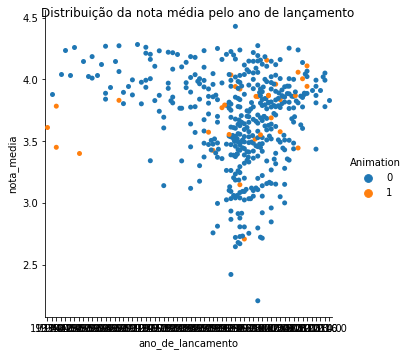

In [59]:
# solução
ax = sns.catplot(x="ano_de_lancamento", y="nota_media", hue="Animation",
                 kind="swarm", margin_titles=True, data=filmes)
ax.fig.suptitle('Distribuição da nota média pelo ano de lançamento')

- Nesse Catplot podemos ver de forma mais leve a distribuição da nota média, de acordo com o ano de lançamento, para o genero Animation em comparação aos outros

Text(0.5, 0.98, 'Distribuição da nota média pelo ano de lançamento')

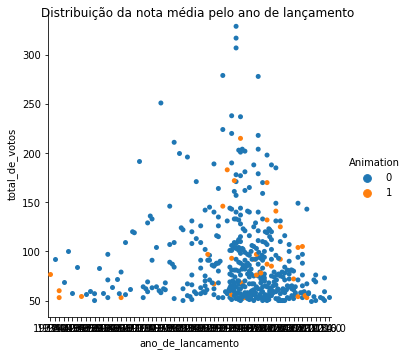

In [60]:
ax = sns.catplot(x="ano_de_lancamento", y="total_de_votos", hue="Animation",
                 kind="swarm", margin_titles=True, data=filmes)
ax.fig.suptitle('Distribuição da nota média pelo ano de lançamento')

- Nesse Catplot podemos ver de forma mais leve a distribuição do total de votos, de acordo com o ano de lançamento, para o genero Animation em comparação aos outros